# **Project Python for Data Science: Austo Motor Data Analysis**

### Context

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

### Objective

They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains different data related to a customer. The detailed data dictionary is given below.

### Data Dictionary

*  Age: The age of the individual in years.
* Gender: The gender of the individual, categorized as male or female.
* Profession: The occupation or profession of the individual.
* Marital_status: The marital status of the individual, such as married &, single
* Education: The educational qualification of the individual Graduate and Post Graduate
* No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
* Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
* House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
* Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
* Salary: The individual's salary or income.
* Partner_salary: The salary or income of the individual's partner, if applicable.
* Total_salary: The total combined salary of the individual and their partner (if applicable).
* Price: The price of a product or service.
* Make: The type of automobile

### **Data Overview** [9 marks]

#### **Importing the necessary libraries**

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### **Loading the dataset**

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data
df = pd.read_csv('/content/drive/austo_automobile+%282%29+%281%29 (1).csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
data = df.copy() #version control

#### **Understanding the structure of the data**

In [ ]:
# Returns the first 5 rows
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


* Looking from the dataset it observed that Salary, Partner_salary and Total_salary are dependent variables.
* There are some numerical variables and categorical variables in the dataset.

In [ ]:
# checking shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1581 rows and 14 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


* There are 6 numerical type columns and 8 object type columns in the data.
* All the columns have 1581 observations except Gender and Partner_salary which has 1528 and 1475 observations indicating that there are some missing values in them.

In [ ]:
df.nunique()

Age                  33
Gender                4
Profession            2
Marital_status        2
Education             2
No_of_Dependents      5
Personal_loan         2
House_loan            2
Partner_working       2
Salary              538
Partner_salary      149
Total_salary        754
Price                53
Make                  3
dtype: int64

* There are 9 catergorical variables and 5 numerical variables.
* Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working and Make are catergorical variables while rest are numerical variables.
* Gender has 4 unique values it seems to have wrong entries in it.

#### **Wrong values treatment**


In [ ]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

`Female` is misspelled as `Femal` and `Femle` in the column. We can treat them.

In [ ]:
# replacing with correct values
df['Gender'] = df['Gender'].replace(['Femal','Femle'],'Female')

In [ ]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

#### **Missing values treatment**

In [ ]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

Gender and Partner_salary columns have null values. Let's check them

**Check if partner is employed but have no salary**

In [ ]:
df.loc[(df['Partner_salary'].isnull()==True) & (df['Partner_working']=='Yes') & (df['Total_salary']==df['Salary'])].shape

(0, 14)

**Check if partner is unemployed but have salary**

In [ ]:
df.loc[(df['Partner_salary'].isnull()==True) & (df['Partner_working']=='No') & (df['Total_salary']!=df['Salary'])].shape

(0, 14)

- There are no such entires so we can update the null values in `Partner_salary` with `Total_salary`.
- Total salary must be `Total_Salary = Salary + Partner_Salary` we can directly treat null rows eaily from this.

**Direct imputation of null values for Partner_salary**

In [ ]:
df['Partner_salary'] = df['Partner_salary'].fillna(value = df['Total_salary'] - df['Salary'])

In [ ]:
df['Partner_salary'].isnull().sum()

0

**Imputation of null values for Gender**

One of the commonly used methods to deal with the missing values is to impute them with the central tendencies - mean, median, and mode of a column.

* `Replacing with mean`: In this method the missing values are imputed with the mean of the column. Mean gets impacted by the presence of outliers, and in such cases where the column has outliers using this method may lead to erroneous imputations.

* `Replacing with median`: In this method the missing values are imputed with the median of the column. In cases where the column has outliers, median is an appropriate measure of central tendency to deal with the missing values over mean. When data is heavily skewed, this method can be used to treat the missing values.

* `Replacing with mode`: In this method the missing values are imputed with the mode of the column. This method is generally preferred with categorical data.

Here gender is categorical variable, so we can go with mode method.

In [ ]:
df['Gender'] = df['Gender'].fillna(value = df['Gender'].mode()[0])

In [ ]:
df['Gender'].isnull().sum()

0

#### **Checking for duplicate entries in the data**

In [ ]:
df.duplicated().sum()

0

#### **Statistical summary**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


- `Age :` Customers age between 22 and 54 years had purchased the cars, 75% were less than 40 years. Average age of the customer is 31 years.
- `Price : ` Price of the cars ranges from 18000 dollars to 70000 dollars. Most of the cars were sold less than 50000 dollars. Average price of the car is 	35598 dollars.
- `Total_salary :` It seems to have outliers. There is a huge difference(76000 dollars) between the 3rd quartile and the maximum value. Customers having total salary 30000 dollars and above were purchasing the cars. Average total salary is 79625 dollars.
- `Salary :` Customers salary ranges from 30000 dollars to 99300 dollars. Average salary of the customer is 60392 dollars.
- `Partner_salary :` Some customers have no working partners. Their total income is just their salary itself. Maximum a partner salary is 80500 dollars. Average partner's salary is 19233 dollars.
- There are some customers who have no dependents.

### **Exploratory Data Analysis**

### **Univariate Analysis**

Different types of Univariate Analysis that can be done:
- Univariate Analysis of  Numerical Variable.
- Univariate Analysis of Categorical Variable.

#### **Explore all the variables (categorical and numerical) in the data - Check for and treat (if needed) outliers - Observations and Insights**  [12 marks]

#### **Numerical variables**

##### **Observations on Age**

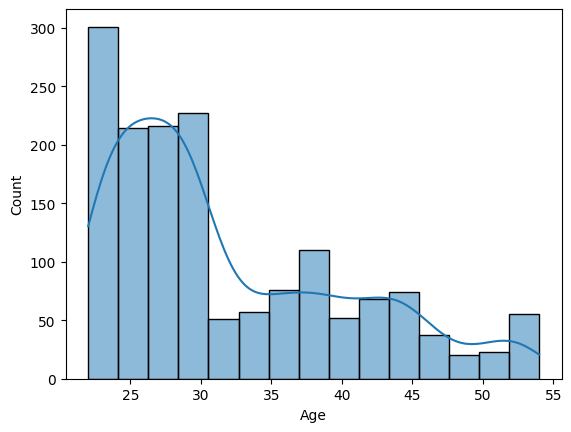

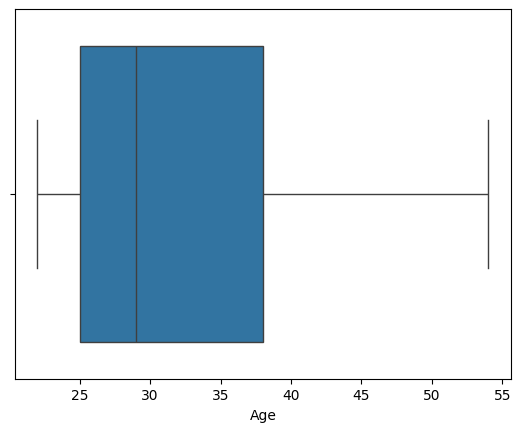

In [ ]:
sns.histplot(data=df,x='Age',kde = True)
plt.show()
sns.boxplot(data=df,x='Age')
plt.show()

In [ ]:
df['Age'].nunique()

33

- The distribution of Age is right skewed with no outliers.
- 50% of customers were less than 30 years while 75% were less than 40 years.
- There are 33 distinct values in the `Age` column.

##### **Observations on Price**

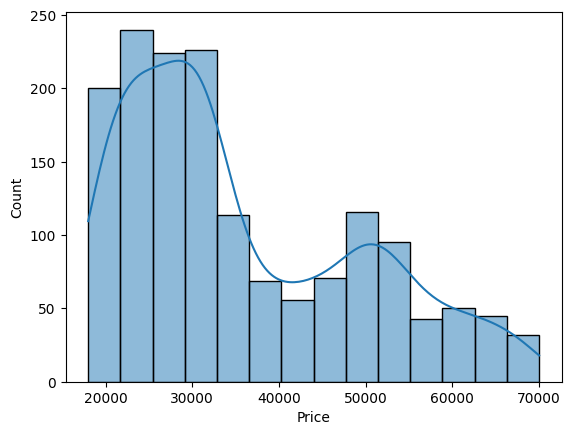

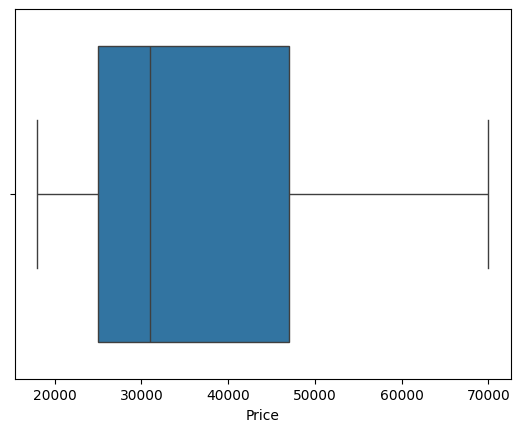

In [ ]:
sns.histplot(data=df,x='Price',kde = True)
plt.show()
sns.boxplot(data=df,x='Price')
plt.show()

In [ ]:
df['Price'].nunique()

53

- The distribution of price is right skewed with no outliers.
- Cars with price less than 50000 dollars were sold higher. Half of the customers purchased the cars less than 30000 dollars.
- People prefer cheaper cars than expensive ones.
- There are 53 distinct values in the price of car.

#####**Observations on Total salary**

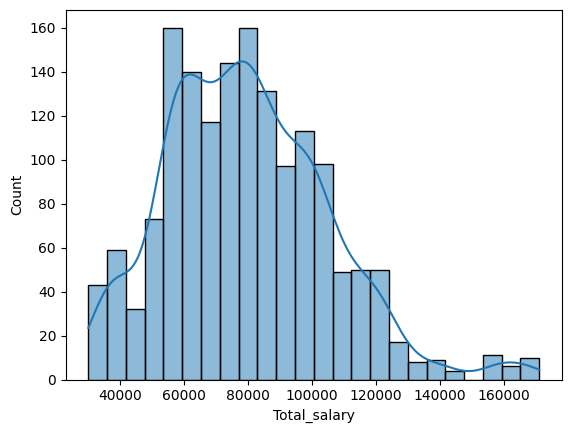

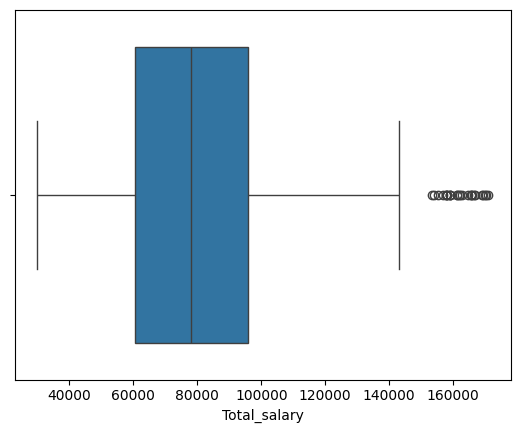

In [ ]:
sns.histplot(data=df,x='Total_salary',kde = True)
plt.show()
sns.boxplot(data=df,x='Total_salary')
plt.show()

- Total salary has outliers.
- Salary greater than 140000 dollars are outliers.
- Customers having total salary between 60000 dollars and 100000 dollars were buying more cars.

In [ ]:
df.loc[df['Total_salary']>140000].shape

(34, 14)

##### **Total salary Vs Partner working**

<Axes: ylabel='Total_salary'>

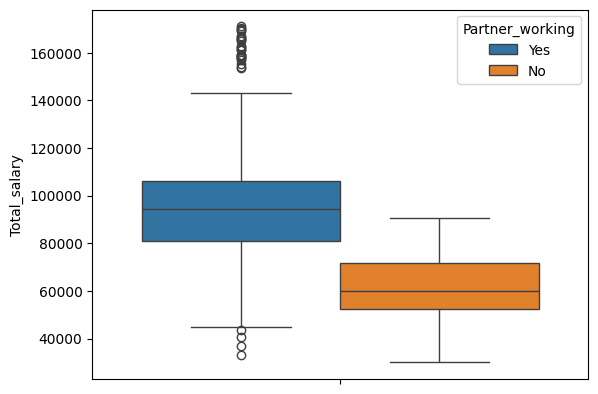

In [ ]:
sns.boxplot(y='Total_salary', hue='Partner_working', data=df) #Bivariate analysis

Customers with working partners are having higher total salary.

##### **Observations on Salary**

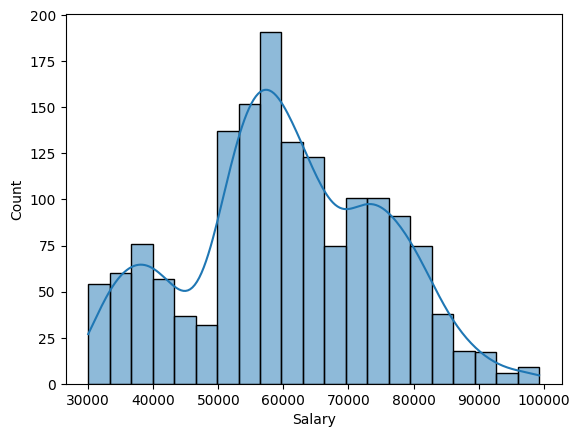

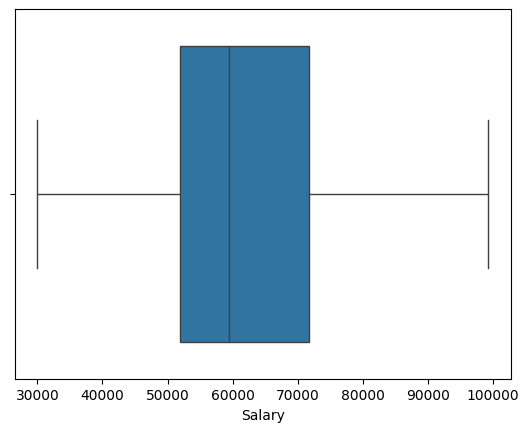

In [ ]:
sns.histplot(data=df,x='Salary',kde=True)
plt.show()
sns.boxplot(data=df,x='Salary')
plt.show()

- Customer salary between 50000 dollars to 75000 dollars are purchasing more cars.
- 50% of salary of the customer is less than 60000 dollars.
- The distribution of salary has no outliers.

##### **Salary Vs Education**

<Axes: ylabel='Salary'>

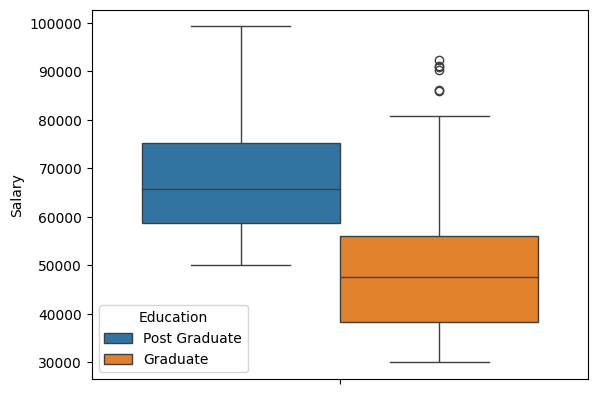

In [ ]:
sns.boxplot(y='Salary', hue='Education', data=df) #Bivariate analysis

- Post graduate customers are having higher salary than graduate customers.
- Minimum salary of post graduates is 50000 dollars while minimum salary of graduates is 30000 dollars.

##### **Salary Vs Profession**

<Axes: ylabel='Salary'>

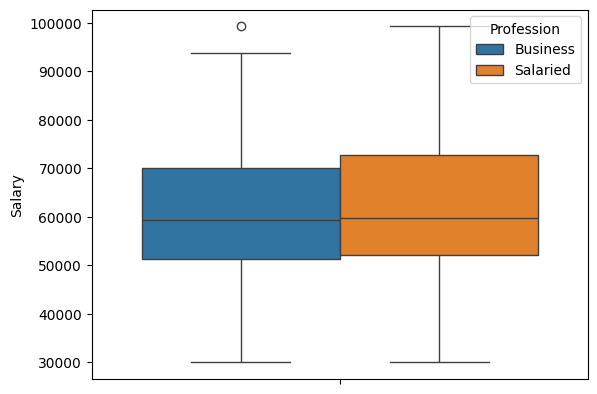

In [ ]:
sns.boxplot(y='Salary', hue='Profession', data=df) #Bivariate analysis

##### **Observations on Partner salary**

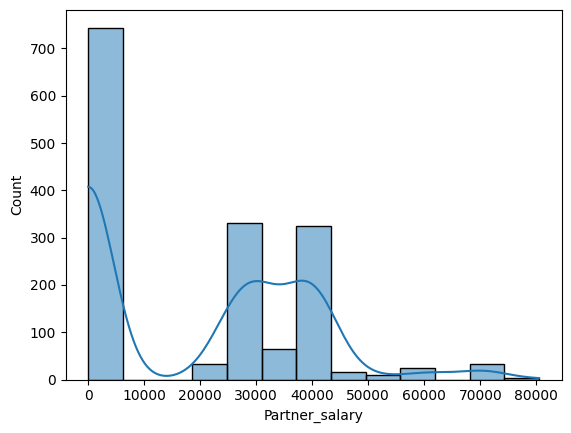

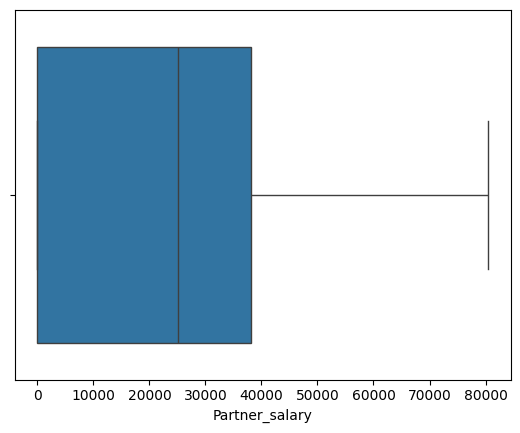

In [ ]:
sns.histplot(data=df,x='Partner_salary',kde = True)
plt.show()
sns.boxplot(data=df,x='Partner_salary')
plt.show()

- The distribution of Partner_salary is right skewed.
- Some customers have no working partners and have 0 partner_salary.

In [ ]:
df.loc[df['Partner_salary']==0].shape

(713, 14)

In [ ]:
df.loc[df['Partner_salary']>40000].shape

(288, 14)

#### **Categorical variables**

In [ ]:
df.nunique()

Age                  33
Gender                2
Profession            2
Marital_status        2
Education             2
No_of_Dependents      5
Personal_loan         2
House_loan            2
Partner_working       2
Salary              538
Partner_salary      150
Total_salary        754
Price                53
Make                  3
dtype: int64

In [ ]:
# Making a list of all categorical variables
cat_cols =  ['Gender', 'Profession', 'Marital_status', 'Education', 'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

Gender
Male      1252
Female     329
Name: count, dtype: int64
--------------------------------------------------
Profession
Salaried    896
Business    685
Name: count, dtype: int64
--------------------------------------------------
Marital_status
Married    1443
Single      138
Name: count, dtype: int64
--------------------------------------------------
Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64
--------------------------------------------------
No_of_Dependents
3    557
2    557
1    229
4    218
0     20
Name: count, dtype: int64
--------------------------------------------------
Personal_loan
Yes    792
No     789
Name: count, dtype: int64
--------------------------------------------------
House_loan
No     1054
Yes     527
Name: count, dtype: int64
--------------------------------------------------
Partner_working
Yes    868
No     713
Name: count, dtype: int64
--------------------------------------------------
Make
Sedan        702
Hatchback   

These are the different categorical variables and their difference in category. Lets plot the variables and analyse.

##### **Observations on No of Dependents**

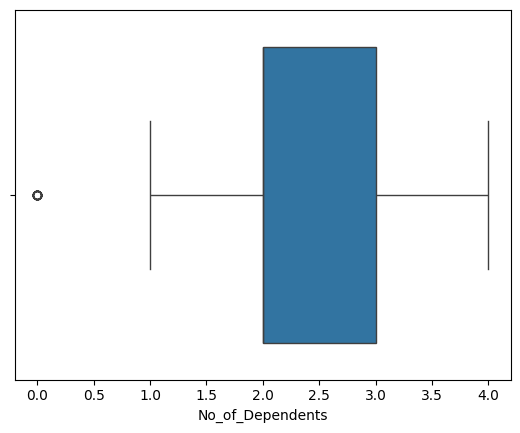

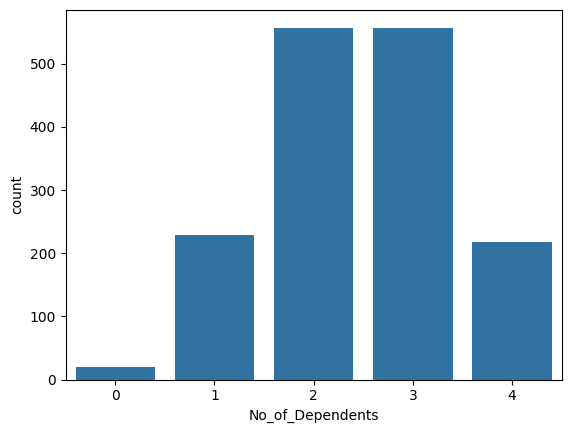

In [ ]:
sns.boxplot(data=df,x='No_of_Dependents')
plt.show()
sns.countplot(data=df,x='No_of_Dependents')
plt.show()

* 50% of customers have 2 to 3 dependents.
* There are some customers who don't have any dependents.

##### **Observations on Gender**

<Axes: xlabel='Gender', ylabel='count'>

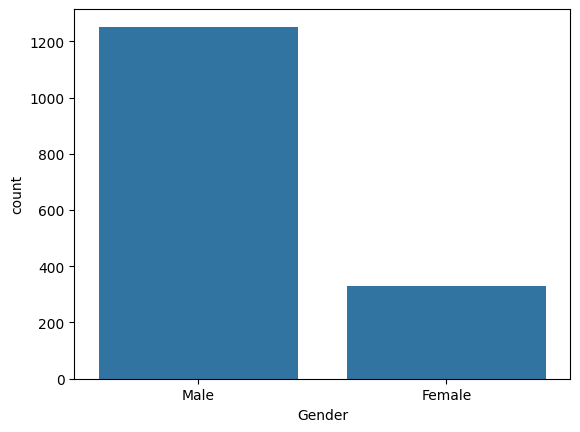

In [ ]:
sns.countplot(data=df,x='Gender')

Difference between number of male and female customers is very high since men are buying more cars than women.

##### **Gender Vs Make**

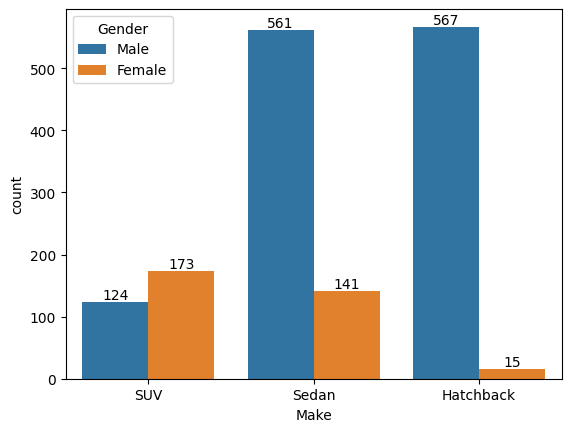

In [ ]:
ax = sns.countplot(data=df,x='Make',hue='Gender') #Bivariate analysis
for bars in ax.containers:
    ax.bar_label(bars)

- Most male customers prefer Hatchback and Sedan cars.
- Most female customers prefer SUV and Sedan cars.
- SUV is least popular among male and Hatchback among female customers.

##### **Observations on Marital status**

<Axes: xlabel='Marital_status', ylabel='count'>

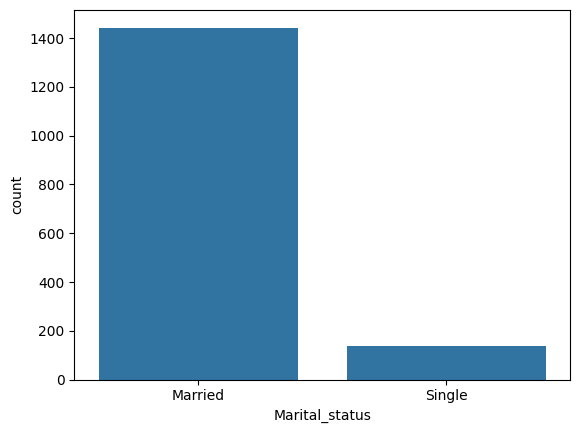

In [ ]:
sns.countplot(data=df,x='Marital_status')

- Married couples are purchasing far more cars than singles.
- There are 1443 married customers and 138 singles.

##### **Marital status Vs Make**

<Axes: xlabel='Marital_status', ylabel='count'>

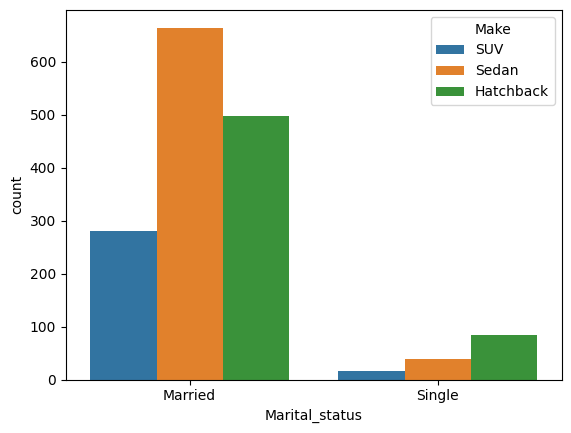

In [ ]:
sns.countplot(data=df,x='Marital_status',hue='Make') #Bivariate analysis

- Sedan is popular among married couples and Singles prefer Hatchback the most.
- SUV is least popular among customers.

##### **Observations on Make**

<Axes: xlabel='Make', ylabel='count'>

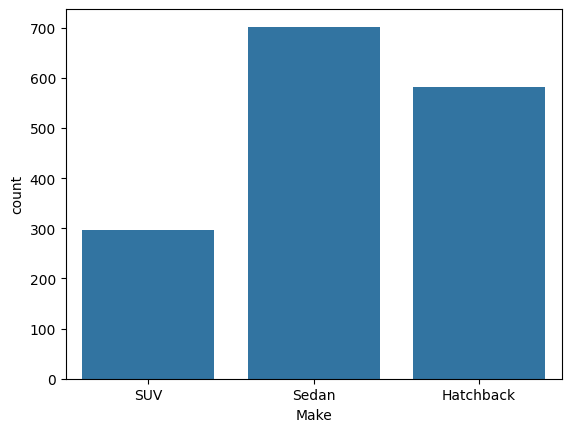

In [ ]:
sns.countplot(data=df,x='Make')

- Sedan is the best selling car and SUV is the least selling car.
- Totally 702 Sedan, 582 Hatchback, 297 SUV were sold.

##### **Make Vs No of Dependents**

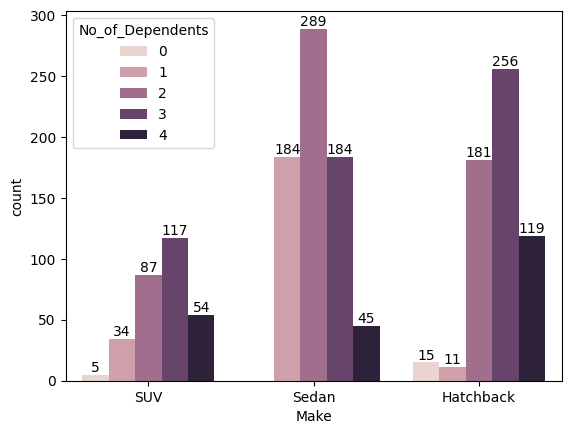

In [ ]:
ax = sns.countplot(data=df,x='Make',hue='No_of_Dependents') #Bivariate analysis
for bars in ax.containers:
    ax.bar_label(bars)

- SUV and Hatchback is popular among customers with 3 financial dependents.
- Sedan is popular among customers with 2 financial dependents.
- Customers with no financial dependents prefer Sedan.
- Customers with 4 financial dependents prefer Hatchback.

##### **Observations on profession**

<Axes: xlabel='Profession', ylabel='count'>

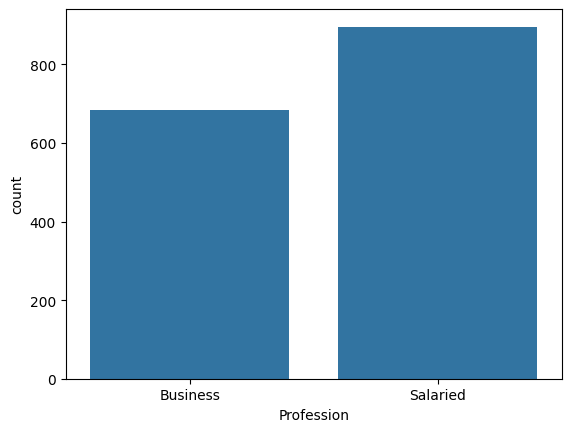

In [ ]:
sns.countplot(data=df,x='Profession')

Salaried are buying more cars than business professionals.

##### **Observations on Education**

<Axes: xlabel='Education', ylabel='count'>

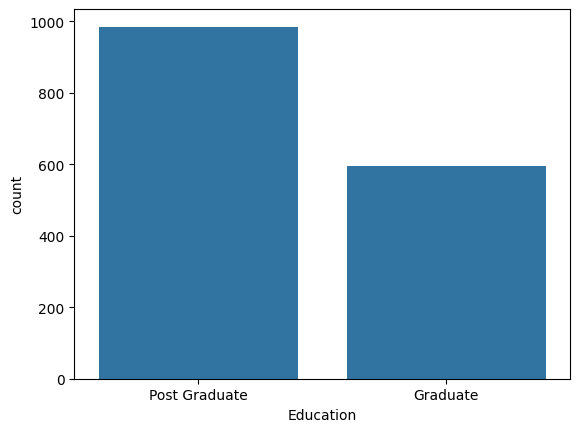

In [ ]:
sns.countplot(data=df,x='Education')

Post graduates prefer more cars than graduates.

##### **Observations on loan**

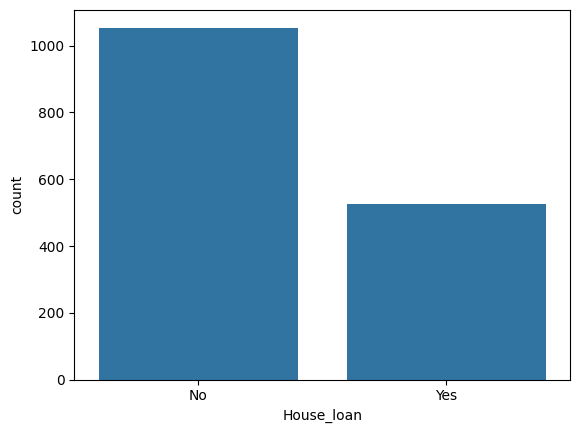

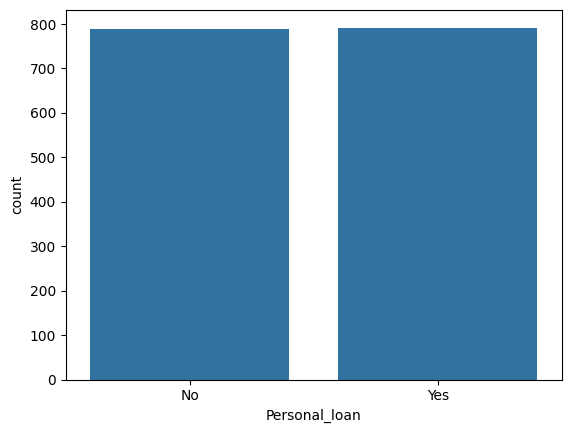

In [ ]:
sns.countplot(data=df,x='House_loan')
plt.show()
sns.countplot(data=df,x='Personal_loan')
plt.show()

Half of the customers have personal loan and one-third of customers have house loan.

##### **Observation on partner working**

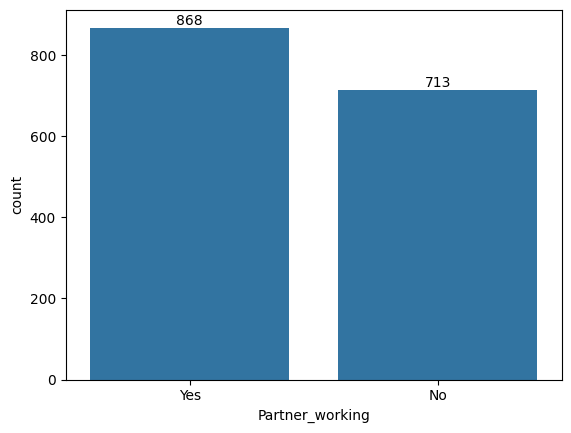

In [ ]:
ax = sns.countplot(data=df,x='Partner_working')
for bars in ax.containers:
    ax.bar_label(bars)

 Atleast half of the customers partners were working professionals.

### **Bivariate Analysis**

#### **Explore the relationship between all numerical variables - Explore the correlation between all numerical variables - Explore the relationship between categorical Vs numerical variables** [12 marks]

Different types of Bivariate Analysis that can be done:
- Bivariate Analysis of two Numerical Variables.
- Bivariate Analysis of two Categorical Variables.
- Bivariate Analysis of one Numerical Variable and one Categorical Variable.

**Let us plot bivariate charts between variables to understand their interaction with each other.**

#### **Correlation by Heatmap**

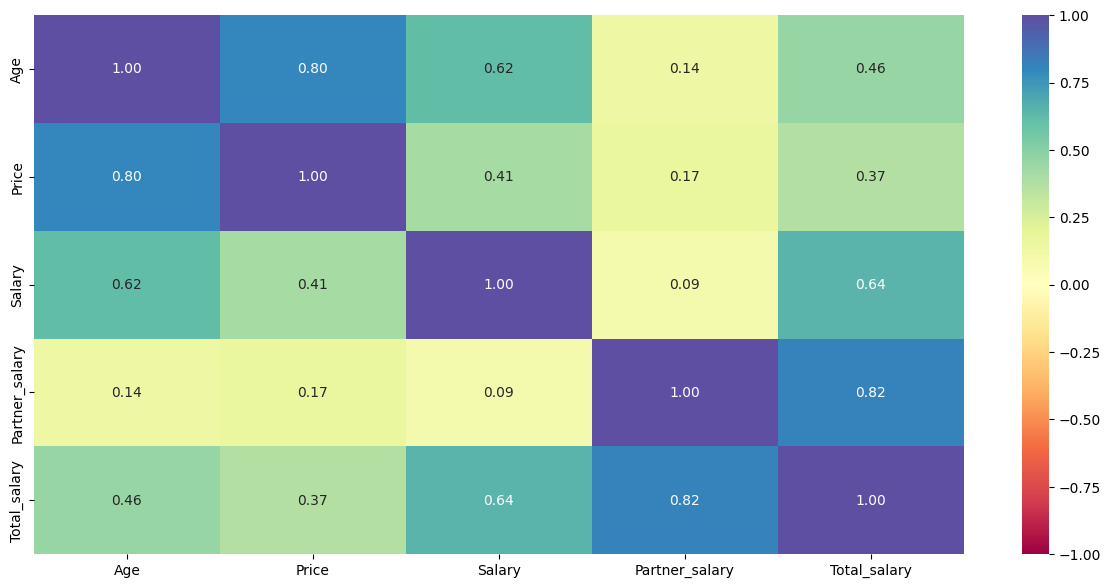

In [ ]:
# Check for correlation among numerical variables
num_var = ['Age','Price','Salary','Partner_salary','Total_salary']

corr = df[num_var].corr()

# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- `Total_salary` is combination of customer salary and partner salary. As expected `Partner_salary` has high correlation with total salary. Customer `Salary` also has better correlation but not as partner salary.
- `Age` has high correlation with `Price` of the car and moderate correlation with `Salary` and `Total_salary`.
- `Price` has moderate correlation with `Salary` and `Total_salary`.
- There is no correlation between `Price` and `Partner_salary`.
- There is no correlation between `Salary` and `Partner_salary`.


#### **Bivariate Scatter Plots**

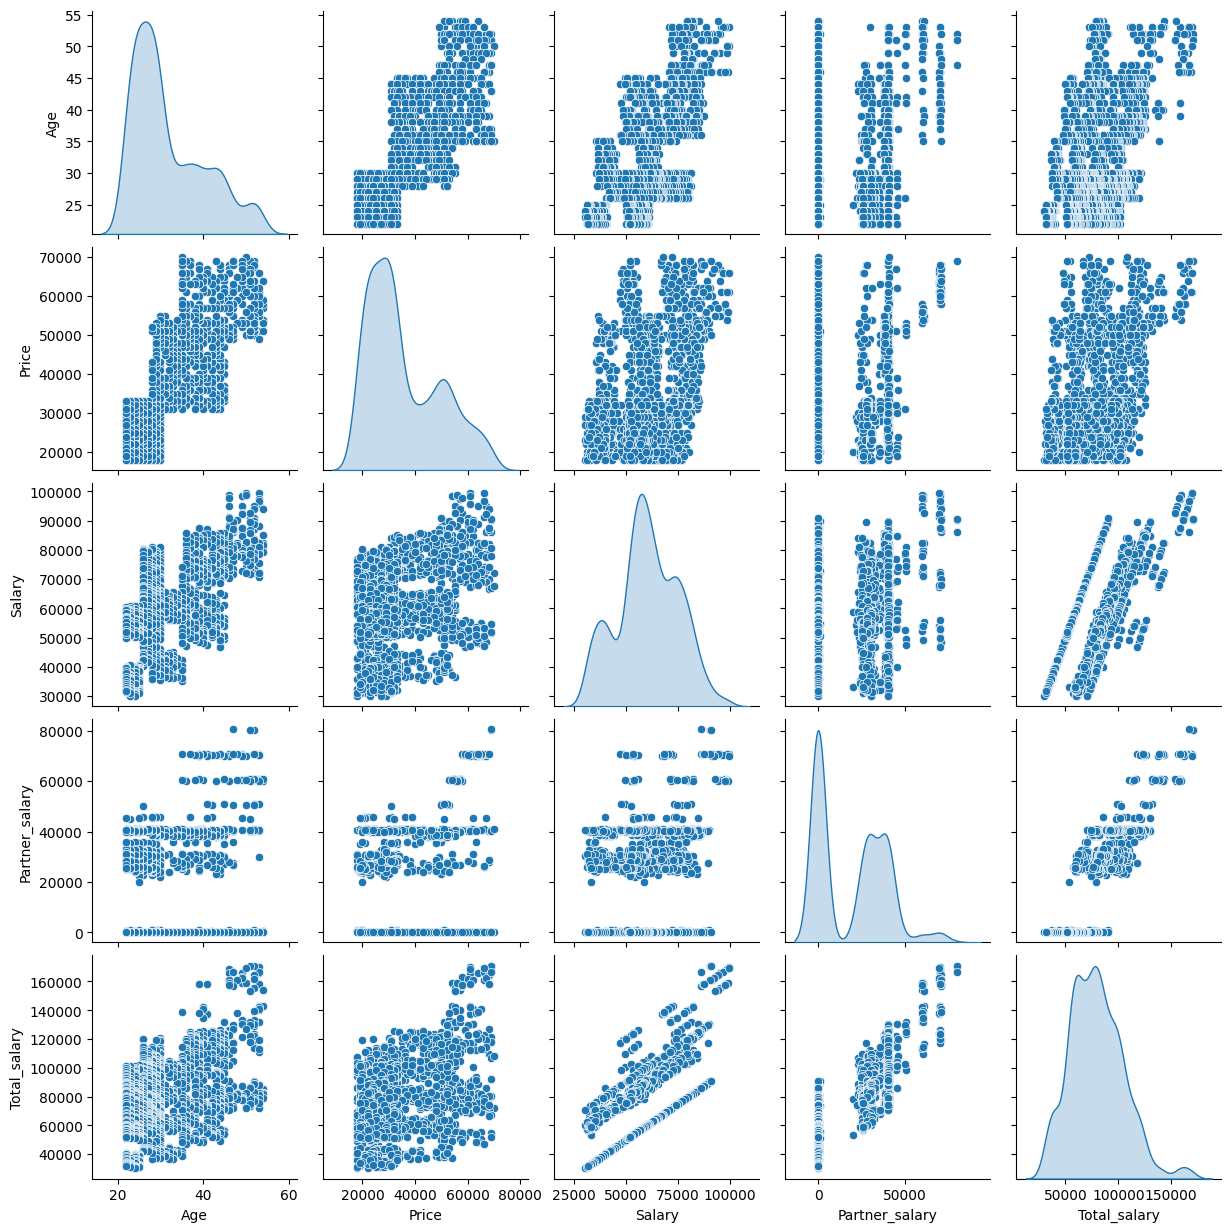

In [ ]:
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

- We get the same insights as from the correlation plot
- Partner salary has only better correlation with total salary.

#### **Age Vs Salary**

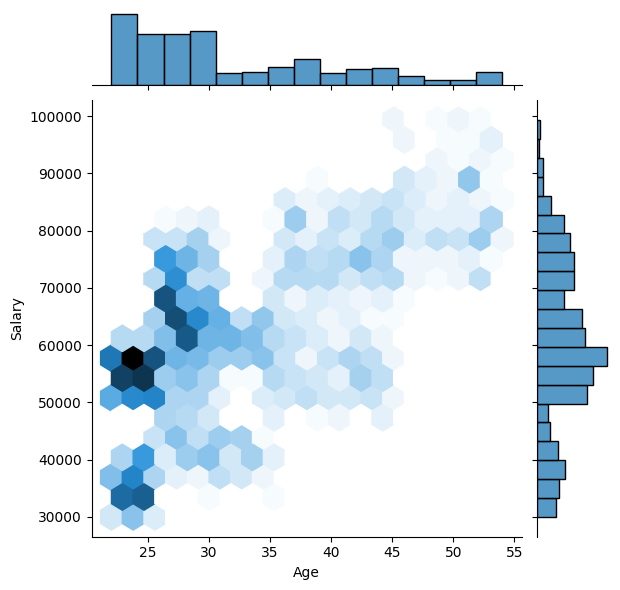

In [ ]:
sns.jointplot(data=df, x='Age', y='Salary', kind="hex");

- Age and salary have positive correlation as in heat map.
- Count of customers with age less than 30 years and salary between 50000 dollars to 70000 dollars were high.

#### **Age Vs Price**

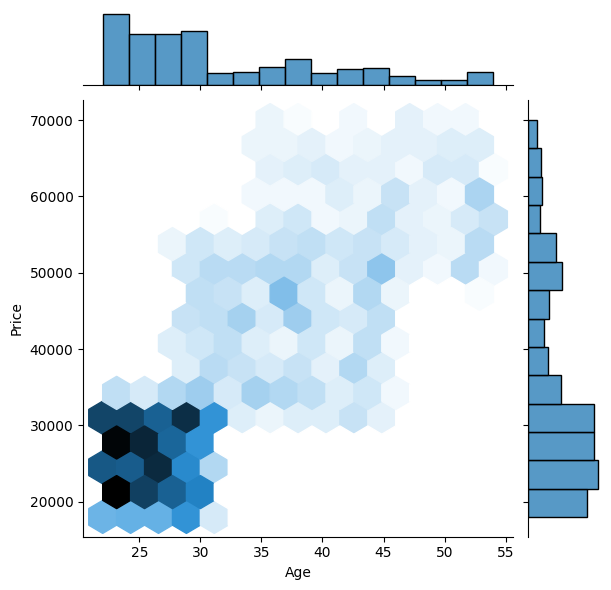

In [ ]:
sns.jointplot(data=df, x='Age', y='Price', kind="hex");

- More young customers whose age less than 30 years prefer cheaper cars.
- Customers above 50 years prefer only expensive cars.
- Customers between 30 to 45 years prefer car above 30000 dollars.

#### **Age Vs Total salary**

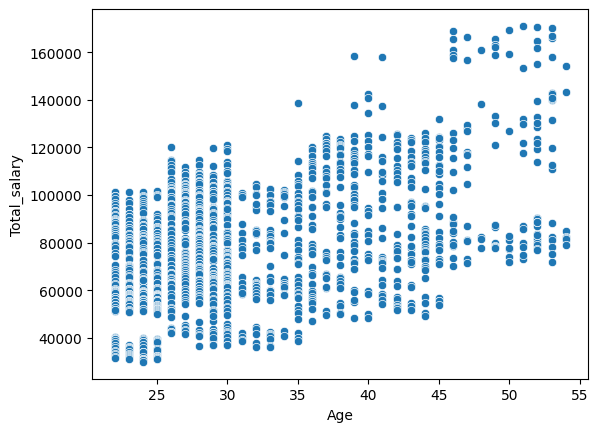

In [ ]:
sns.scatterplot(data=df, x='Age', y='Total_salary');

As seen from heat map age has positive correlation with total salary.

#### **Age Vs Gender**

<Axes: ylabel='Age'>

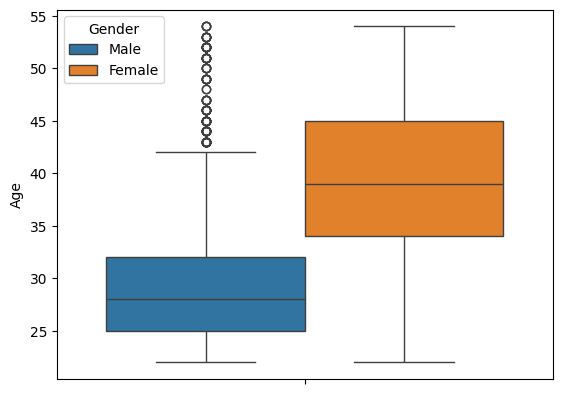

In [ ]:
sns.boxplot(y='Age', hue = 'Gender', data=df)

- Maximum number of men were below 45 years.
- 75% of women were below 45 years.

#### **Age Vs Marital status**

<Axes: ylabel='Age'>

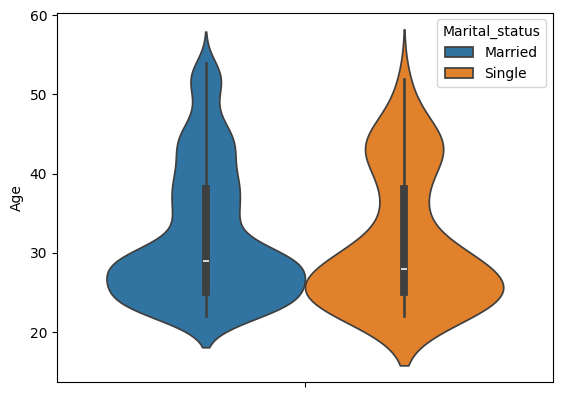

In [ ]:
sns.violinplot(y='Age', hue = 'Marital_status', data=df)

There is no correlation between age and marital status.

#### **Total salary Vs Price**

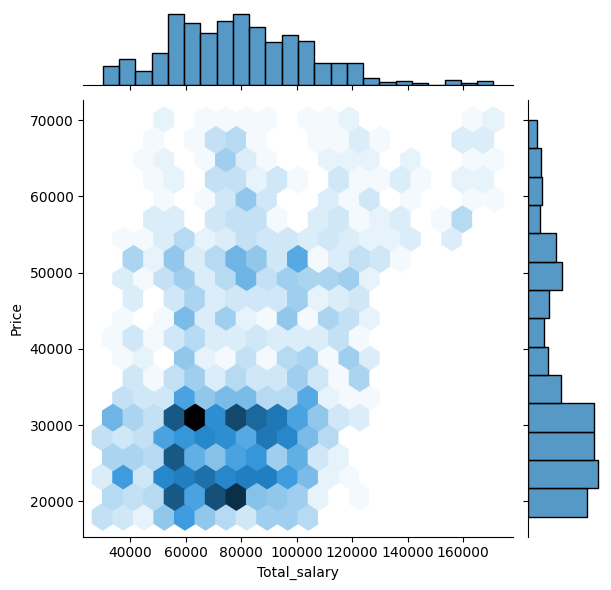

In [ ]:
sns.jointplot(data=df, x='Total_salary', y='Price',kind = 'hex');

- There is positive correlation between total salary and price.
- Higher total salary higher the cost of car purchased.

#### **Total salary Vs Partner salary**

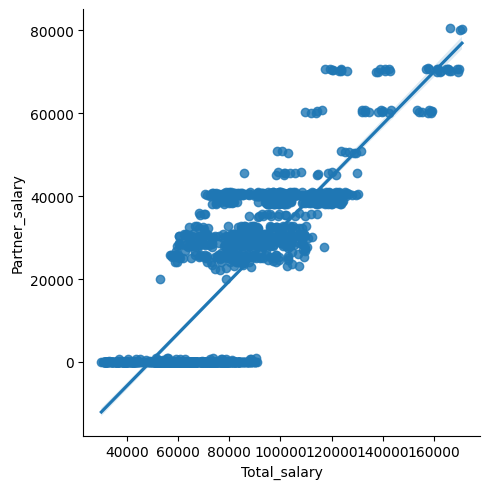

In [ ]:
sns.lmplot(data=df, x='Total_salary', y='Partner_salary');

Total salary has positive correlation with partner salary

#### **Total salary Vs Salary**

<Axes: xlabel='Salary', ylabel='Total_salary'>

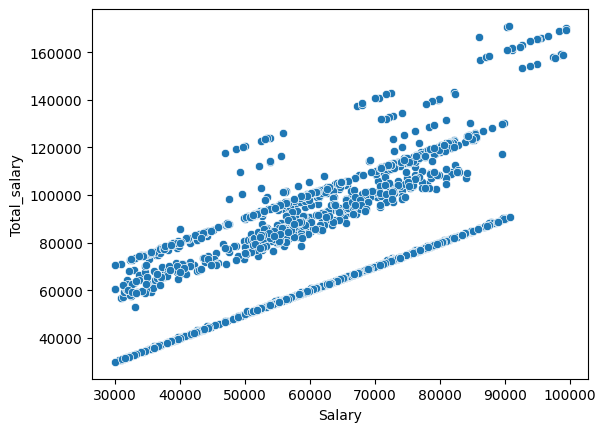

In [ ]:
sns.scatterplot(y='Total_salary', x = 'Salary', data=df)

Salary has positive correlation with partner salary

#### **Price Vs No of dependents**

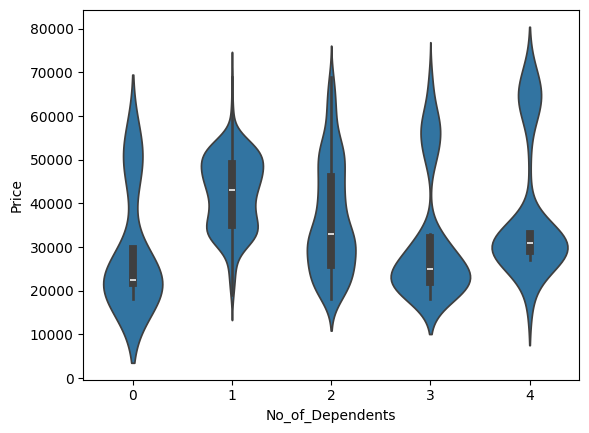

In [ ]:
sns.violinplot(data=df, x='No_of_Dependents', y='Price');

No of dependents doesn't affect the price of car purchased.

#### **Price Vs Gender**

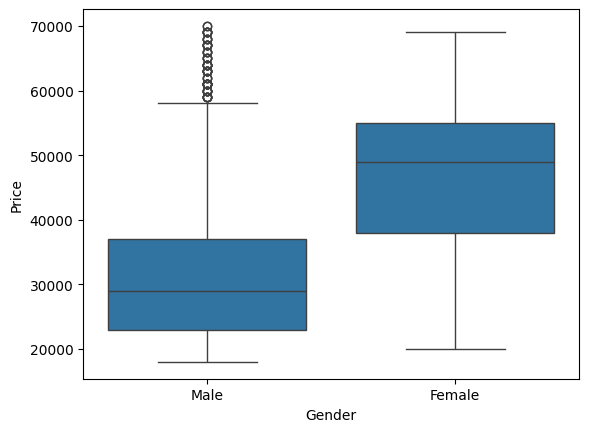

In [ ]:
sns.boxplot(data=df, x='Gender', y='Price');

- Men prefer cheaper cars than expensive ones.
- Women prefer expensive cars.

In [ ]:
print('Total male customers: ',df.loc[df['Gender']=='Male'].shape[0])
print('Male purchasing <$40000 cars: ',df.loc[(df['Gender']=='Male')&(df['Price']<40000)].shape[0])
print('Male purchasing >=$40000 cars: ',df.loc[(df['Gender']=='Male')&(df['Price']>=40000)].shape[0] )
print('Total female customers: ',df.loc[df['Gender']=='Female'].shape[0])
print('Female purchasing <$40000 cars: ',df.loc[(df['Gender']=='Female')&(df['Price']<40000)].shape[0])
print('Female purchasing >=$40000 cars: ',df.loc[(df['Gender']=='Female')&(df['Price']>=40000)].shape[0] )

Total male customers:  1252
Male purchasing <$40000 cars:  965
Male purchasing >=$40000 cars:  287
Total female customers:  329
Female purchasing <$40000 cars:  96
Female purchasing >=$40000 cars:  233


#### **Price Vs Education**

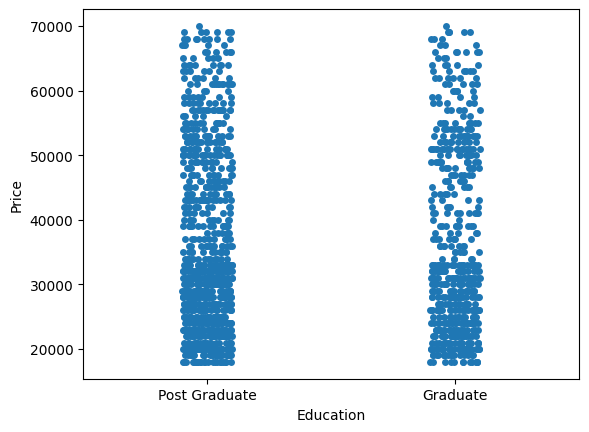

In [ ]:
sns.stripplot(data=df, x='Education', y='Price');

Eduaction doesn't affect the price of the car.

#### **Price Vs Profession**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


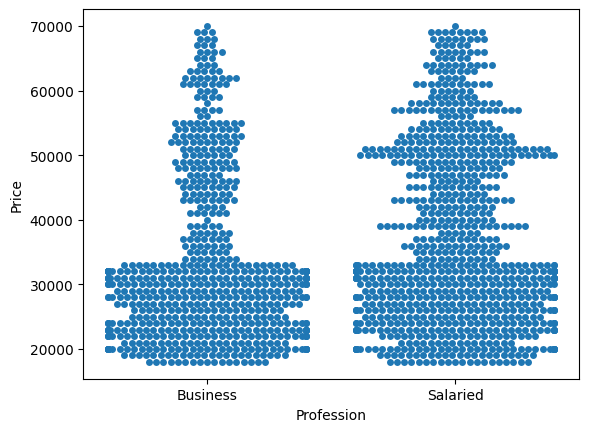

In [ ]:
sns.swarmplot(data=df, x='Profession', y='Price');

Profession doesn't affect the price of the car.

#### **Price Vs Marital status**

<Axes: xlabel='Price', ylabel='Marital_status'>

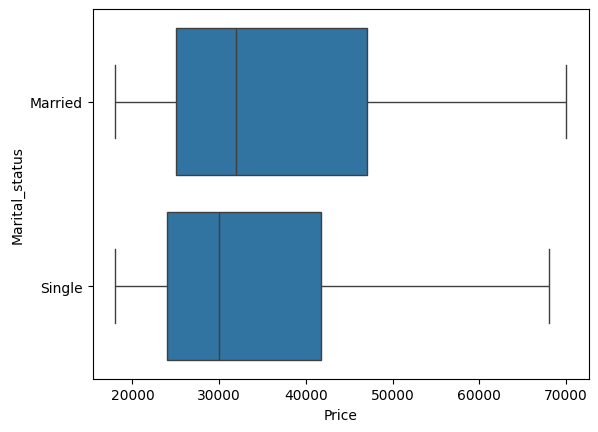

In [ ]:
sns.boxplot(y='Marital_status', x = 'Price', data=df)

- Married prefer all cost of cars.
- Singles mostly prefer cheaper cars.

#### **Price Vs loans**

**Price Vs House loan**

<Axes: xlabel='House_loan', ylabel='Price'>

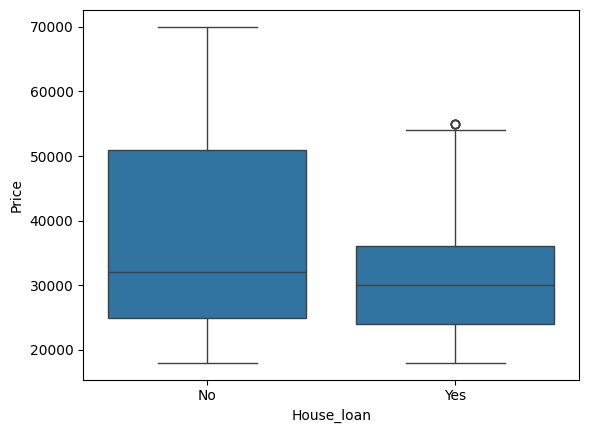

In [ ]:
sns.boxplot(x='House_loan', y = 'Price', data=df)

- Customers with house loan mostly prefer cheaper cars where 75% buy less than 40000 dollars cars.
- 75% of customers with no house loan buy less than 50000 dollars cars.

**Price Vs Personal loan**

<Axes: xlabel='Personal_loan', ylabel='Price'>

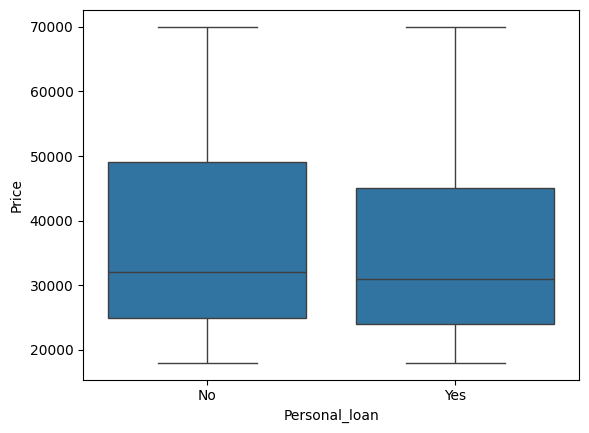

In [ ]:
sns.boxplot(x='Personal_loan', y = 'Price', data=df)

#### **Price Vs Salary**

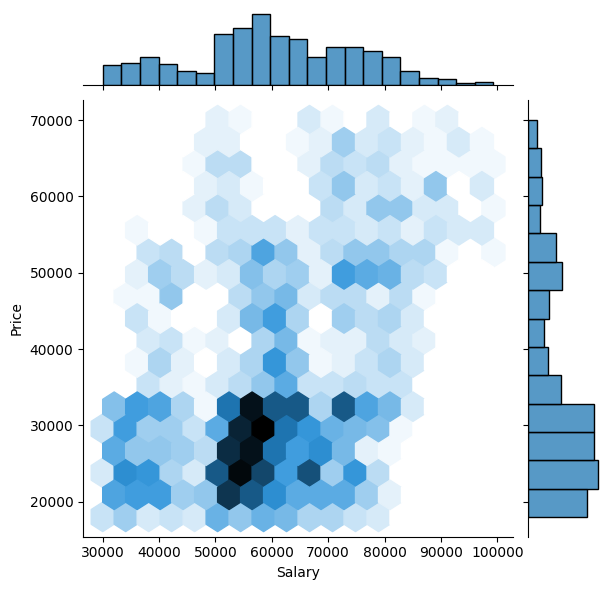

In [ ]:
sns.jointplot(y='Price', x = 'Salary', data=df, kind="hex")

- Salary has positive correlation with price.
- Customer having salary 50000 dollars to 70000 dollars are buying more cars with price ranges from 20000 to 35000 dollars.

#### **Price Vs Partner salary**

<Axes: xlabel='Partner_salary', ylabel='Price'>

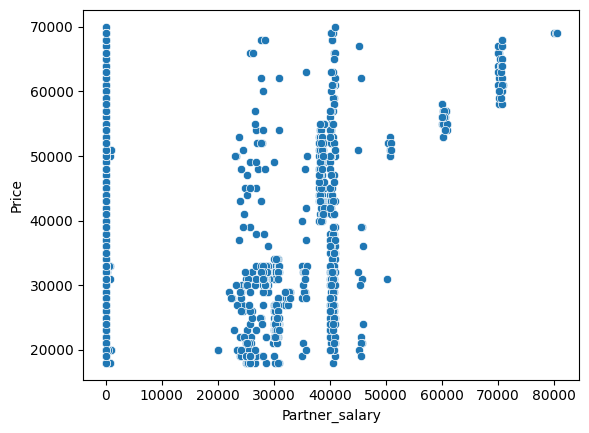

In [ ]:
sns.scatterplot(y='Price', x = 'Partner_salary', data=df)

#### **Price Vs Partner working**

<Axes: xlabel='Partner_working', ylabel='Price'>

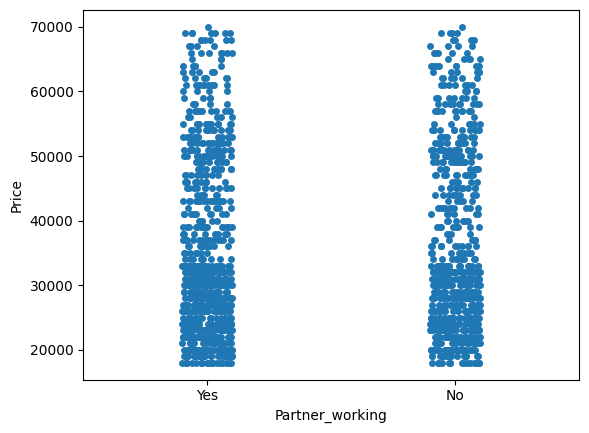

In [ ]:
sns.stripplot(y='Price', x = 'Partner_working', data=df)

In [ ]:
print(df.loc[(df['Partner_working']=='Yes') & (df['Price'] > 45000)].shape)
print(df.loc[(df['Partner_working']=='No') & (df['Price'] > 45000)].shape)

(220, 16)
(196, 16)


- Working partner and their salary does not influence the purchase of cars.
- Price has no correlation with partner working.

#### **Make Vs Price**

In [ ]:
df1=df.loc[df['Make']=='SUV']
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,297.0,43.989899,6.664491,28.0,39.0,45.0,50.0,54.0
No_of_Dependents,297.0,2.609428,0.966838,0.0,2.0,3.0,3.0,4.0
Salary,297.0,72266.666667,14252.816222,36000.0,61600.0,74000.0,82200.0,99300.0
Partner_salary,297.0,24324.915825,27190.852970,0.0,0.0,700.0,40900.0,80500.0
Total_salary,297.0,96591.582492,32140.509137,36800.0,73700.0,87600.0,119600.0,171000.0
Price,297.0,55824.915825,9218.242714,31000.0,51000.0,57000.0,63000.0,70000.0


In [ ]:
df2=df.loc[df['Make']=='Sedan']
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,702.0,31.952991,6.520400,22.0,27.0,30.0,37.0,45.0
No_of_Dependents,702.0,2.128205,0.874803,1.0,1.0,2.0,3.0,4.0
Salary,702.0,59769.658120,13197.894815,30100.0,52700.0,59800.0,68600.0,85800.0
Partner_salary,702.0,19815.099715,17733.324929,0.0,0.0,25500.0,38400.0,45900.0
Total_salary,702.0,79584.757835,22025.133708,31100.0,61650.0,78750.0,97175.0,125500.0
Price,702.0,34603.988604,11152.164304,18000.0,24000.0,33000.0,44000.0,55000.0


In [ ]:
df3=df.loc[df['Make']=='Hatchback']
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,582.0,25.726804,2.500796,22.0,24.0,26.0,28.0,30.0
No_of_Dependents,582.0,2.778351,0.880470,0.0,2.0,3.0,3.0,4.0
Salary,582.0,55083.505155,13084.408983,30000.0,45425.0,56100.0,64775.0,80900.0
Partner_salary,582.0,15934.536082,16479.294672,0.0,0.0,900.0,30300.0,50300.0
Total_salary,582.0,71018.041237,21017.605953,30000.0,56400.0,70450.0,86375.0,121000.0
Price,582.0,26474.226804,4290.467640,18000.0,23000.0,27000.0,30000.0,33000.0


<Axes: xlabel='Make', ylabel='Price'>

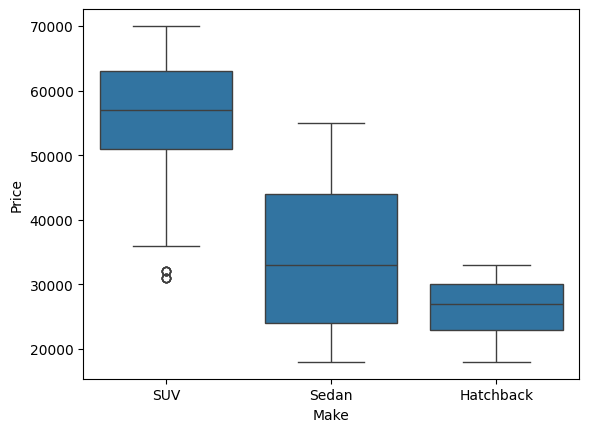

In [ ]:
sns.boxplot(x='Make', y = 'Price', data=df)

- `Hatchback:` Min, max and average price were 18000, 33000 and 26474 dollars. Cheapest of all cars.
- `Sedan:` Min, max and average price were 18000, 55000 and 34604 dollars. 75% were less than 45000 dollars.
- `SUV:` Min, max and average price were 31000, 70000 and 55825 dollars. 75% were sold above 50000 dollars. Costliest of all cars

#### **Make Vs Age**

<Axes: xlabel='Make', ylabel='Age'>

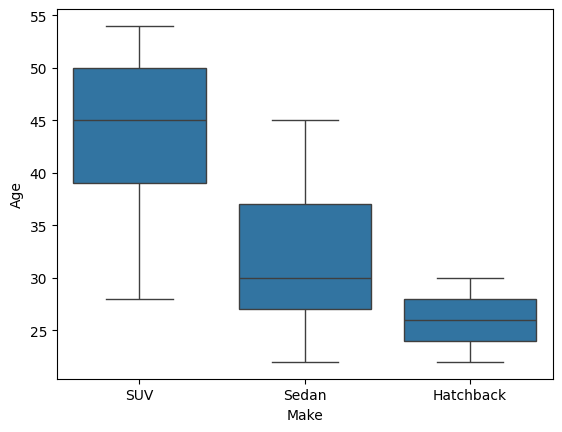

In [ ]:
sns.boxplot(y='Age', x = 'Make', data=df)

- `Hatchback:` These cars were preferred by young customers age less than or equals to 30 years only. Average age of customers were 26 years.
- `Sedan:` They were sold to customers having age less than 45 years. Average age of customers were 32 years.
- `SUV:` Average and max age were 44 and 54 years.
- Only SUV were sold to customers age greater than 45 years.
- Customers age between 30 to 45 years prefer both Sedan and SUV.


#### **Make Vs Total salary**

<Axes: xlabel='Make', ylabel='Total_salary'>

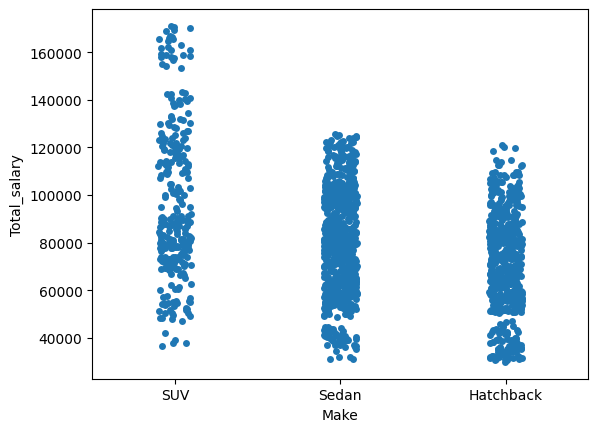

In [ ]:
sns.stripplot(y='Total_salary', x = 'Make', data=df)

- Customers total salary above 120000 dollars buy SUV.
- Customer total salary less than 120000 dollars buy all type of cars.

#### **Make Vs Salary**

<Axes: xlabel='Make', ylabel='Salary'>

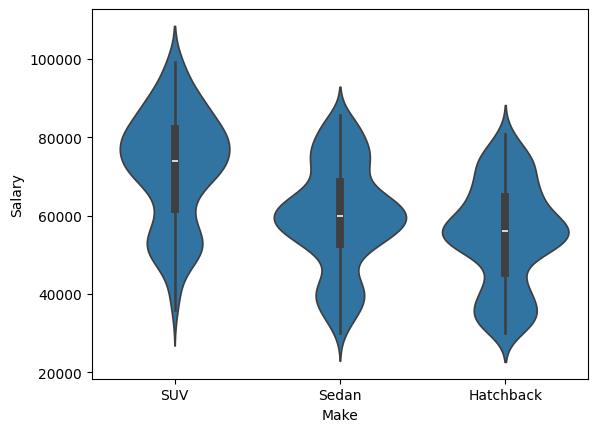

In [ ]:
sns.violinplot(y='Salary', x = 'Make', data=df)

- `Hatchback:` Min, max and average salary were 30000, 80900 and 55084 dollars.
- `Sedan:` Min, max and average salary were 30100, 85800 and 59770 dollars.
- `SUV:` Min, max and average salary were 36000, 99300 and 72267 dollars.

#### **Make Vs Partner salary**

<Axes: xlabel='Make', ylabel='Partner_salary'>

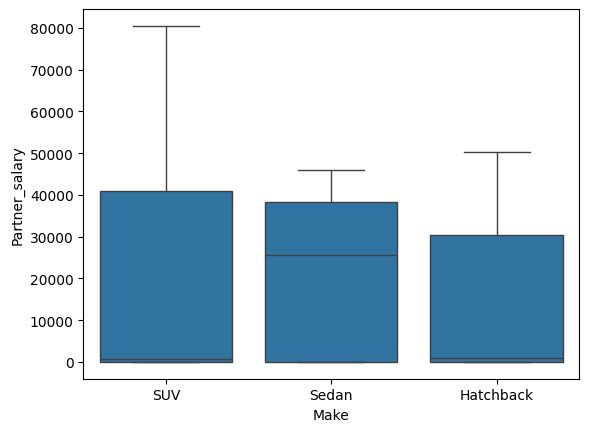

In [ ]:
sns.boxplot(y='Partner_salary', x = 'Make', data=df)

- `Hatchback:` Min, max and average partner salary were 0, 50300 and 15935 dollars.
- `Sedan:` Min, max and average partner salary were 0, 45900 and 19815 dollars.
- `SUV:` Min, max and average partner salary were 0, 80500 and 24324 dollars. Has highest partner salary.
- 75% all the patners salary were less than 41000 dollars.

#### **Make Vs Partner working**

<Axes: xlabel='Make', ylabel='count'>

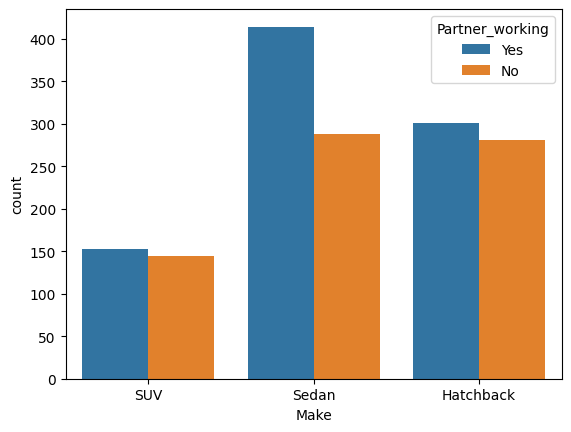

In [ ]:
sns.countplot(x='Make', hue = 'Partner_working', data=df)

- Customer with and without working partner doesn't affect the sales of SUV and hatchback.
- Customers with working partners buy more Sedan than without working partners.

#### **Make Vs Education**

<Axes: xlabel='Make', ylabel='count'>

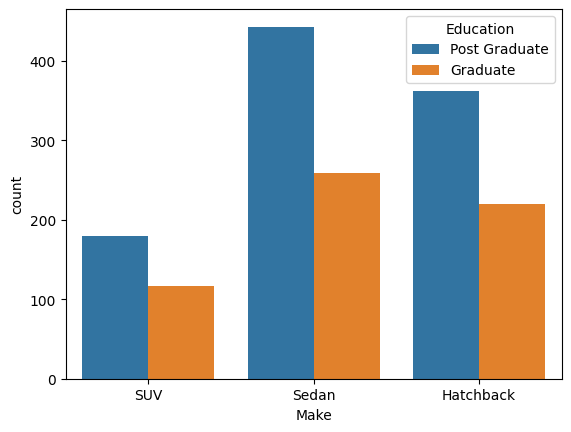

In [ ]:
sns.countplot(x='Make', hue = 'Education', data=df)

Post graduates are buying more cars than graduates in all category of cars.

#### **Make Vs Profession**

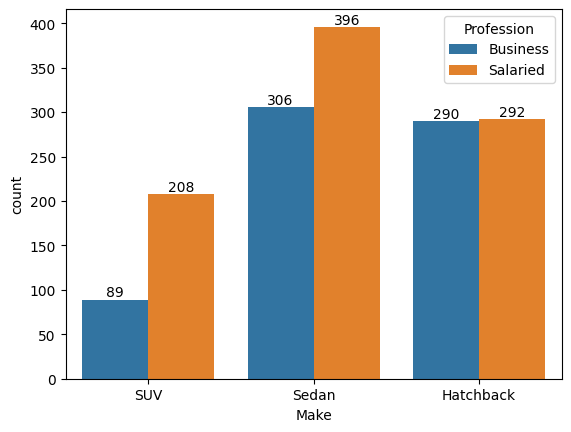

In [ ]:
ax = sns.countplot(x='Make', hue = 'Profession', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

- Salaried people buy more SUV and Sedan than business people.
- Hatchback sales is equal between salaried and business people.
- Business professionals prefer Sedan and Hatchback the most.

#### **Make Vs Loans**

**Make Vs House loan**

<Axes: xlabel='House_loan', ylabel='count'>

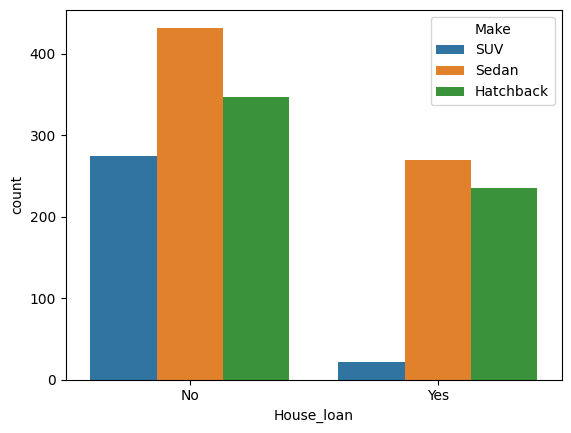

In [ ]:
sns.countplot(hue='Make', x = 'House_loan', data=df)

- SUV is least sold among customers with house loan.
- Sedan is most sold among customers with and without house loan.

**Make Vs Personal loan**

<Axes: xlabel='Make', ylabel='count'>

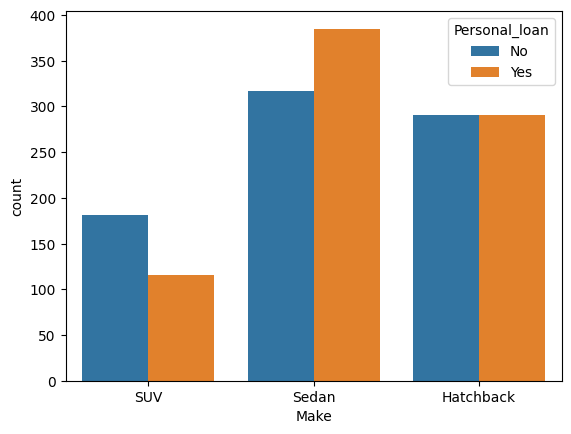

In [ ]:
sns.countplot(x='Make', hue = 'Personal_loan', data=df)

#### **Marital status Vs Partner working**

<Axes: xlabel='Marital_status', ylabel='count'>

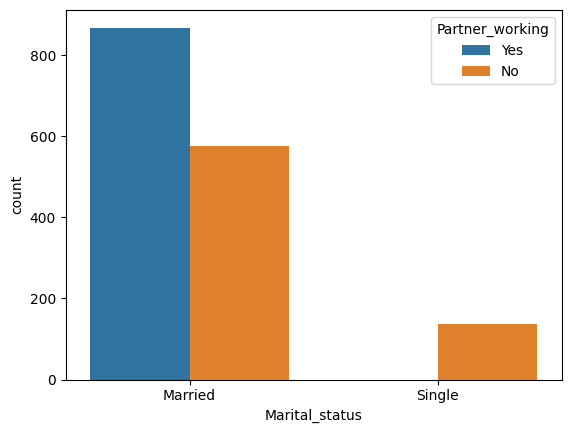

In [ ]:
sns.countplot(data=df,x='Marital_status',hue='Partner_working')

Married couples have more working partners

### **Multivariate Analysis**

Let's create customer profile with age, gender, marital status.

In [ ]:
# categorising the age
df['Age_group'] = pd.cut(data['Age'],bins=[20,28,36,44,54],labels=['groung_1','groung_2','groung_3','groung_4'], right = False)

#### **Customer profile**

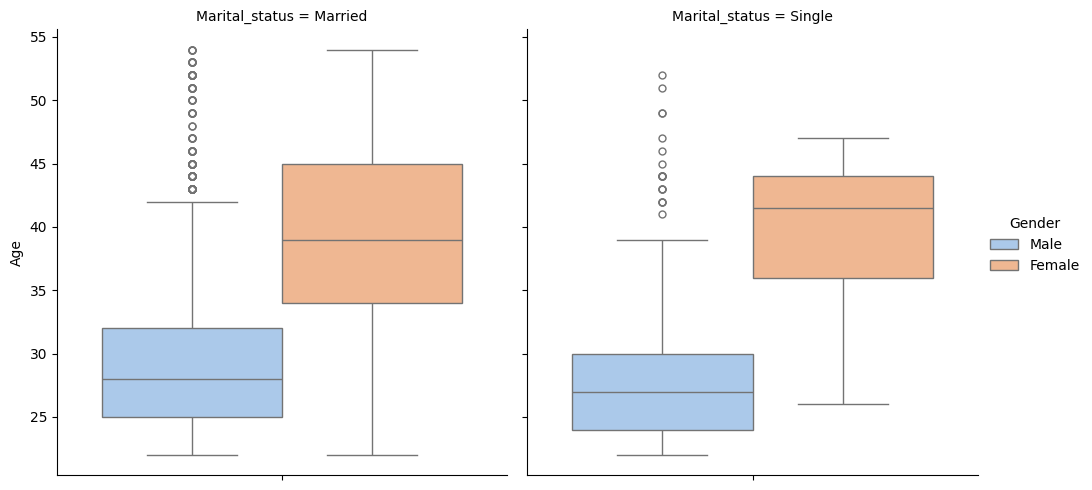

In [ ]:
sns.catplot(data=df, hue="Gender", y='Age', col="Marital_status", kind='box', palette='pastel')

#### **Cutomer profile Vs Make**

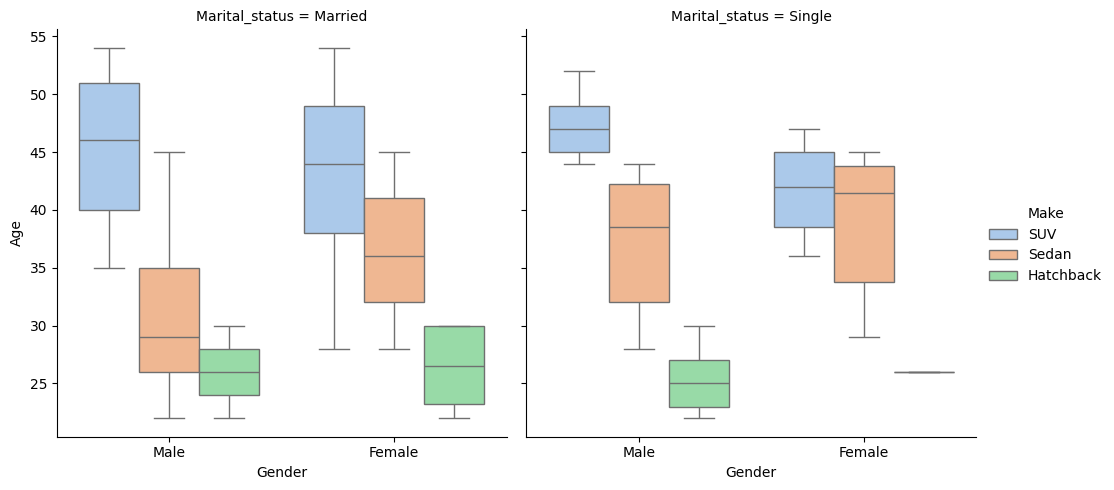

In [ ]:
sns.catplot(data=df, x="Gender", y="Age", hue="Make", col="Marital_status", kind='box', palette='pastel');

- All type of customers age less than 30 years prefer Hatchback.
- Single and married men above 45 years prefer only SUV.
- Married women above 45 years prefer only SUV.
- No cars were purchased by unmarried women above 45 years.
- Single women purchased least number of Hatchback.

#### **Cutomer profile Vs price**

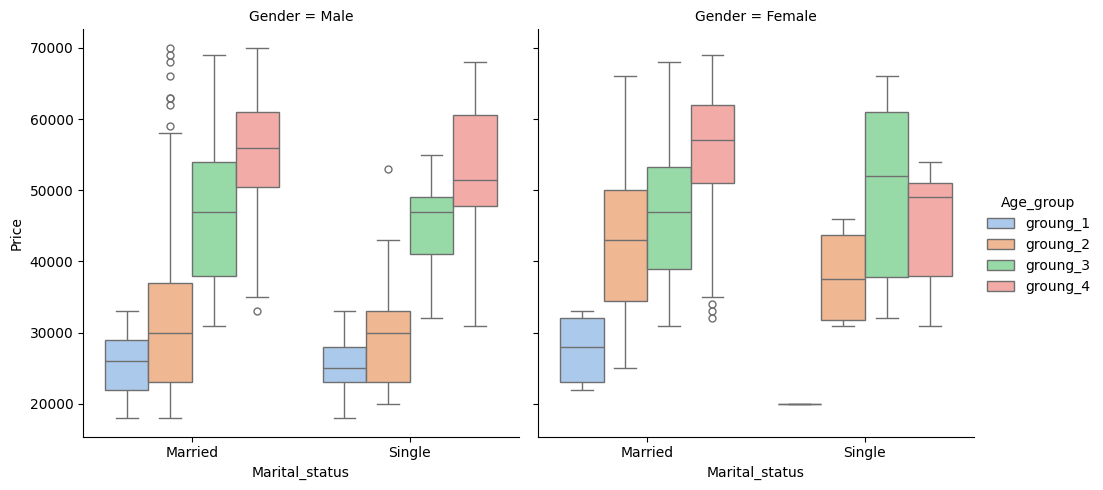

In [ ]:
sns.catplot(data=df, x="Marital_status", y="Price", hue="Age_group", col="Gender", kind='box', palette='pastel');

- Men age between 30 to 40 years buy all cost of cars.
- People above 40 years buy expensive cars above 50000 dollars.

#### **Age Vs Make Vs Price**

<ipython-input-73-cc13f1584557>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, col="Age_group", y="Price", x="Make", kind='strip', palette='pastel');


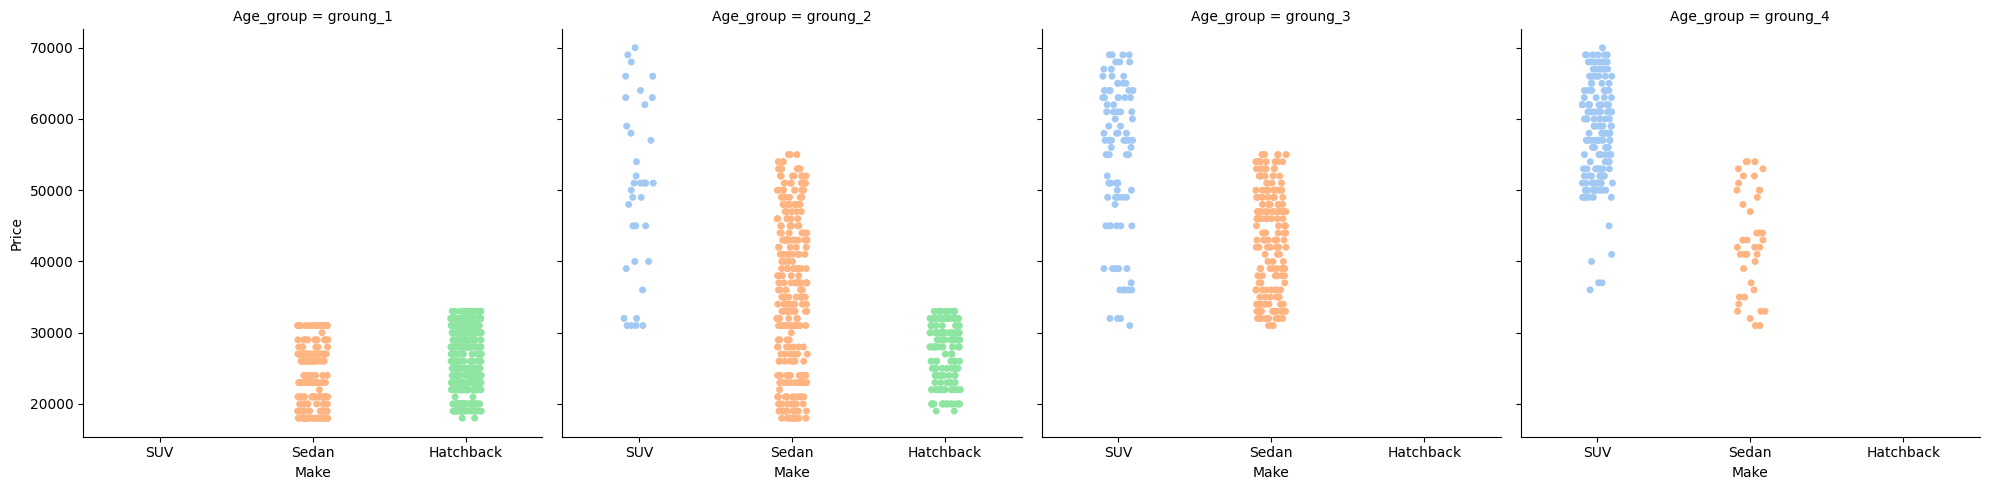

In [ ]:
sns.catplot(data=df, col="Age_group", y="Price", x="Make", kind='strip', palette='pastel');

-	Young age customers prefer cheaper cars and Hatchback type were sold at cheaper price than other type cars.
-Young customers age less than 30 years were the easy target for Hatchback sale.

#### **Gender Vs Make VS Marital status**

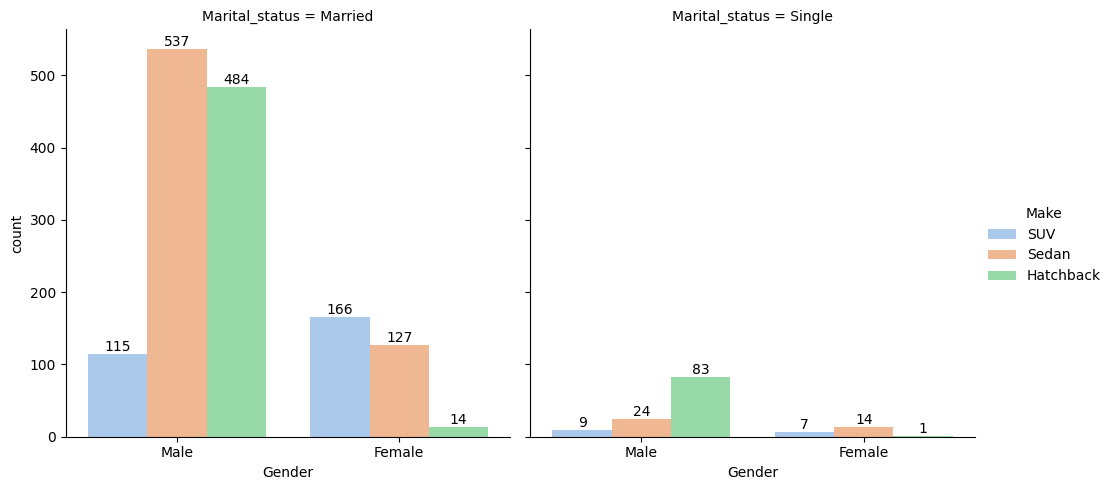

In [ ]:
gr = sns.catplot(data=df, x="Gender", hue="Make", col="Marital_status", kind='count', palette='pastel')
ax = gr.facet_axis(0, 0)
for ax in gr.axes.ravel():
  for bars in ax.containers:
    ax.bar_label(bars)

- Sedan is very popular among married men while Hatchback ranked next to it.
- SUV is popular among married women while Sedan ranked next to it.
- No single women prefer Hatchback. Very less number of SUV and Sedan were sold among single women.
- Single men prefer Hatchback compared to other type cars.


#### **Gender Vs Make Vs Profession**

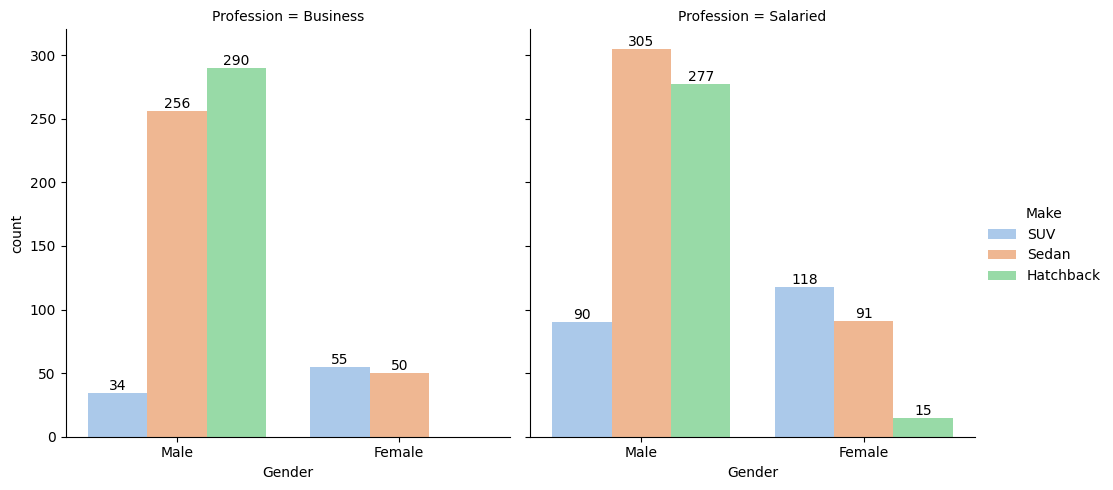

In [ ]:
gr = sns.catplot(data=df, x="Gender", hue="Make", col="Profession", kind='count', palette='pastel');
ax = gr.facet_axis(0, 0)
for ax in gr.axes.ravel():
  for bars in ax.containers:
    ax.bar_label(bars)

- No business women buy Hatchback
- Hatchback sale top among business men.
- Sedan sale top among salaried men.
- SUV sale top among salaried women.

#### **Gender Vs Make Vs House loan Vs Price**

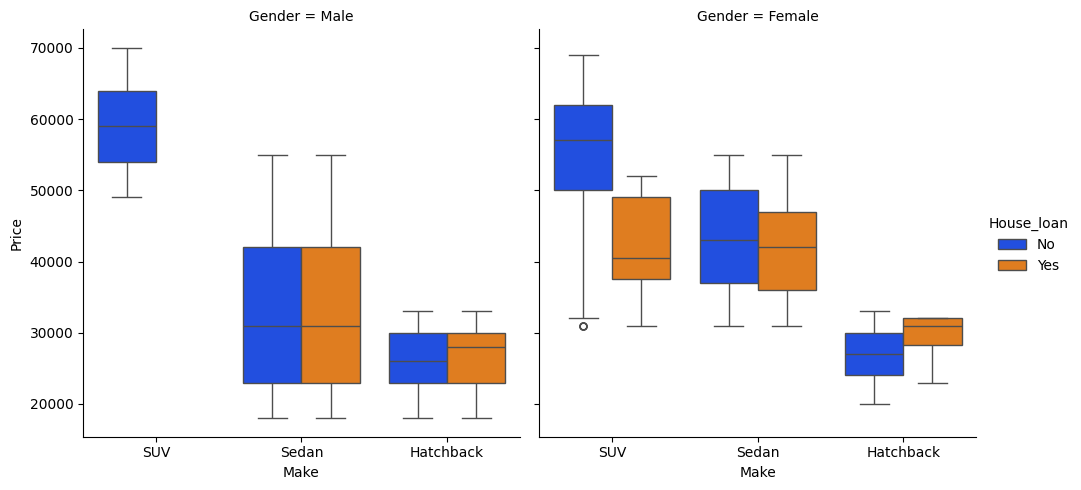

In [ ]:
sns.catplot(data=df, x="Make", y="Price", hue="House_loan", col="Gender", kind='box', palette='bright');

- No SUV were purchased by men with house loan.
- Loan doesn't affect price of Hatchback and Sedan sale among men and women.
- Women without house loan purchased expensive SUV than with loan.

### **Outlier Detection and Treatment**

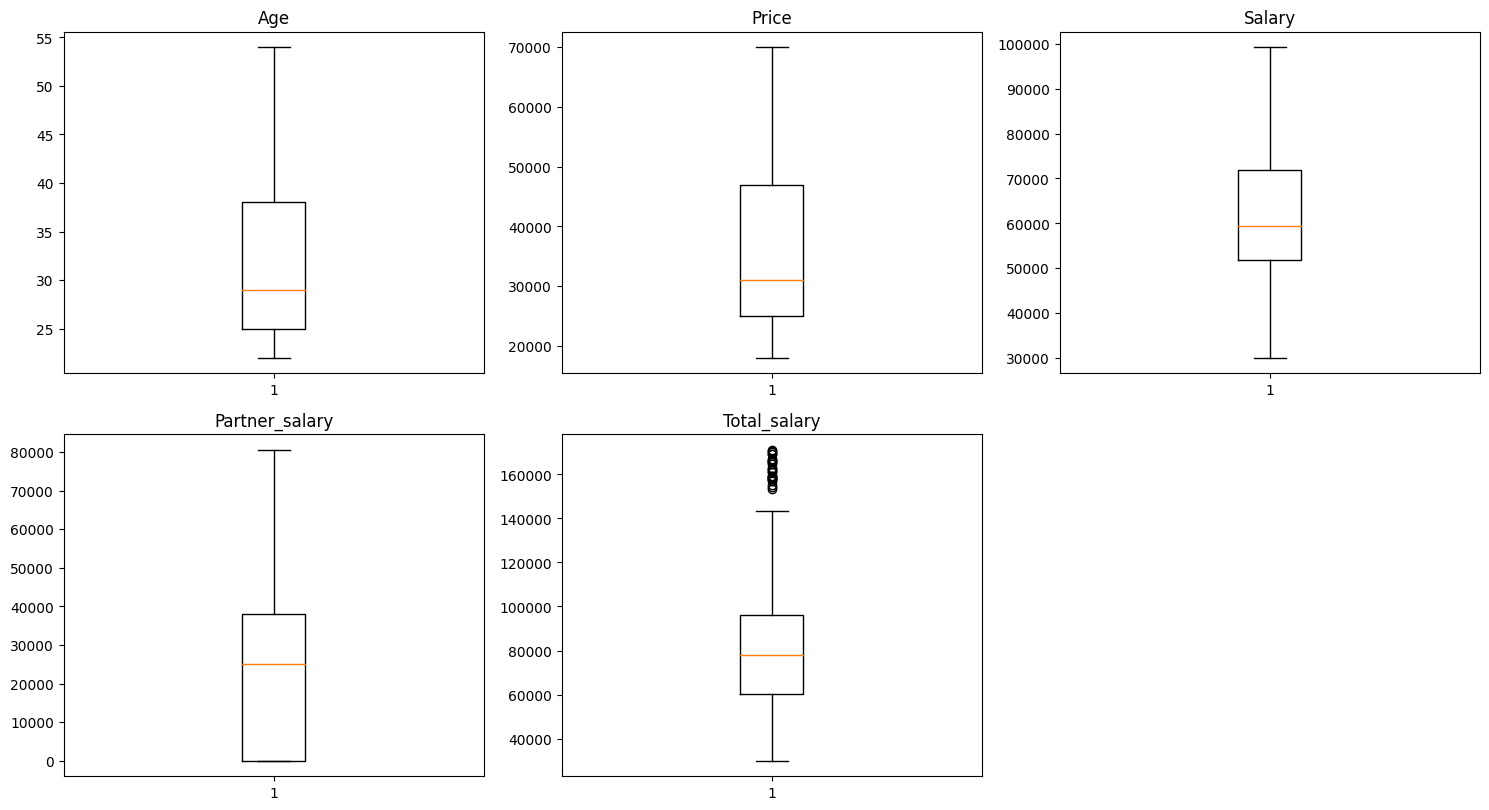

In [ ]:
# outlier detection using boxplot
# selecting the numerical columns of the data
num_col = ['Age','Price','Salary','Partner_salary','Total_salary']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_col):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Only `Total_salary` column has some outliers.
- However we don't need to treat this column, since `Total_salary` is the combination of `Salary` and `Partner_salary` columns and we may miss out some genuine values if we treat this column.

### **Key Questions** [15 marks]

From the analysis we can answer to the key question that will help the company to improve the business.



 **Question 1: Do men tend to prefer SUVs more compared to women?**

- No, from the analysis it is observed that men prefer less SUV than women.
- Totally 297 SUV cars were sold out of which 124 SUV were purchased by men and 173 SUV were purchased by women.

**Question 2: What is the likelihood of a salaried person buying a Sedan?**

 - Salary professionals prefer Sedan the most.
 - Seden is bestselling car among the salaried person.
 - Almost 400 salaried person purchased Sedan.

**Question 3 : What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?**

```
Totally cars sold to men : 1252
Salaried men : 672
  SUV count : 90
  Sedan count : 305
  Hatchback count : 277
Business men : 580
  SUV count : 34
  Sedan count : 256
  Hatchback count : 290
```
- Salaried men prefer Sedan than SUV.
- Business men is easy target for Hatchback.
- Also, we can see salaried men ranked second in SUV sale.
- Therefore, we can target on salaried men to increase the SUV sales.

**Question 4: How does the amount spent on purchasing automobiles vary by gender?**


```
Total male customers : 1244
Male purchasing <$40000 cars : 965 (77%)
Male purchasing >$40000 cars : 279 (22%)
Total female customers : 325
Female purchasing <$40000 cars : 96 (30%)
Female purchasing >$40000 cars : 229 (70%)
```
- From the analysis it is observed that the percentage of male purchasing expensive cars is less than the percentage of female.
- Most of the men prefer cheaper cars with price less than 40000 dollars.
- Most of the women prefer expensive cars.

**Question 5: How much money was spent on purchasing automobiles by individuals who took a personal loan?**
  - Money spent on purchasing automobiles by individuals who took personal loan is same as individuals without personal loan.
  - Most of individuals with personal loan purchased car less than 50000 dollars. 50% were even less than 35000 dollars.

**Question 6: How does having a working partner influence the purchase of higher-priced cars?**
-	Working partner does not influence the price of cars.
-	Number of customers having working partner is 868 and non-working partner is 713.
-	Also shown from the heat map, correlation between price and partner salary is 0.17


### **Actionable Insights and Recommendations** [6marks]

#### **Insights**
We have analysed sales of car by Austo motor company to get a fair idea about the demand of customers which will help them in enhancing their customer experience. The main features of interest are number of cars sold, their price and different variety of car (SUV, Sedan, Hatchback).
We have been able to conclude that,
-	Car sale is best among young customers and they prefer cheaper cars.
-	Customer salary influence the amount spent on purchasing automobiles.
-	Generally, sales of automobile on men are higher than women particularly married men. But percentage of women preferring expensive cars are higher than the percentage of men.
-	Hatchback type cars are sold at lower price while SUV type were sold at higher price.
-	Most cars were sold to the customers with 2 or 3 dependents and least count of cars were sold to the customers with no dependents even though they don’t have to support any individual financially. Sedan is bestselling among customers with two dependent and Hatchback among three dependents.
-	Customers with working partner purchased slightly more cars but having working partner and partner's salary doesn't influence price of car. High-priced cars were purchased by both type customers.


#### **Recommendations**

-	Sedan is the top selling and SUV is least selling car by company. We have to focus on SUV to increase its sale.
-	An average price of SUV was higher than Sedan. Since people are preferring cheaper car, we recommend to provide offers to reduce SUV cost so that we can increase their sales.
-	Young customers contribute more to the car sales. They prefer cheaper cars and Hatchback were sold at cheaper price than other type cars. We conclude that young customers age less than 30 years were the easy target for Hatchback sale.
-	Married men are easy target for Sedan and Hatchback. SUV sale on women is comparatively higher than sale on men.
-	Hatchback is famous among business men and Sedan among salaried men. SUV is famous among salaried women.